In [1]:
#Elizabeth Pieters
#Problem 3, Problem set 1

In [2]:
import numpy as np
import scipy.interpolate as sp_int
import matplotlib.pyplot as mpl

DEBUG = True

In [3]:
#Steps:
    #1. pick some number of sample points and sample cos(x)
    #2. run the three different fitting functions on it
        #compare error : WHAT did SIEVERS use as his error metric in the lecture video??
        #because we know what actual value is, rms error: np.std(y_interp - y_true)
    #3. repeat but with Lorentzian
    
    #fitting functions that I could use:
        # cubic spline: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline
        


In [4]:
#first define the fitting functions

#inputs: data xi, yi, and desired interpolation x data x_test
def fit_poly(xi, yi, x_test):
    #have a polynomial ZERO at all the points but one, multiply that by the value at one, then muliply it all together
    order = num_points-1
    y_poly = np.zeros(num_test_points)

    mpl.figure()                                #will be plotting in loop
    for ii in range(num_points):                #need to do for every data point
        x_temp = np.append(xi[:ii], xi[ii+1:])  #remove point ii from the array
        coeff = np.prod(xi[ii] - x_temp)        #coefficient necessary to normalize polynomial 
        p0 = 1                                  #initialize polynomial at 1 to iteratively multiply by it

        for xx in x_temp:                       #evaluate each polynomial
            p0 = p0*(x_test - xx)               #generate the polynomial for each test point
        p0 = p0 / coeff                         #divide by the necessary coefficient to normalize it
        mpl.plot(x_test, p0)

        #scale polynomial so that it achieves the correct y value at the data point where it's nonzero, sum
        y_poly += p0*yi[ii]                     #sum all the scaled polynomials

    mpl.title('Individual normalized polynomials for polynomial fit')
    mpl.show()                                  #end loop plotting
    
    return y_poly



def rat_fit_full(xi, yi, n, m, x_test, SING_MAT = False):
    p, q = rat_fit(xi, yi, n, m, SING_MAT)
    return rat_eval(p, q, x_test)


def rat_fit(xi, yi, n, m, SING_MAT = False):
    mat = np.zeros([n+m-1, n+m-1])             #init square matrix
    for ii in range(n):                        #fill in p section, 1, x, ... x**n
        mat[:, ii] = xi**ii
        #print('n ii', ii, mat)
    for i, ii in enumerate(range(n, n+m-1)):   #fill in q section, -yx, ... -yx**m
        mat[:, ii] = -yi*xi**(i+1)             #power for x starts at 1
        #print('m ii', ii, mat)
    if SING_MAT:                                   #use pinv which helps with singular matrices 
        coeff=np.dot(np.linalg.pinv(mat),yi)        #invert and multiply matrix to solve for p,q coefficients
    else:
        coeff=np.dot(np.linalg.inv(mat),yi)         #invert and multiply matrix to solve for p,q coefficients
    p=coeff[:n]
    q=coeff[n:]
    #print('p and q are ', p, q)
    #print('my rat fit ', mat)
    #print(coeff)
    return p, q
    

def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):     #evaluate p
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):     #evaluate q
        bot=bot+q[i]*x**(i+1)
    return top/bot
    
def rat_fit_JS(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]
    #print('js rat fit ', mat)
    #print(pars)
    return p,q

In [5]:
# #define main body function which will compare the interpolation methods for the ones fed in

# def interp_compare(n, m, num_test_points, xi, yi, x_test, y_true):
# #     

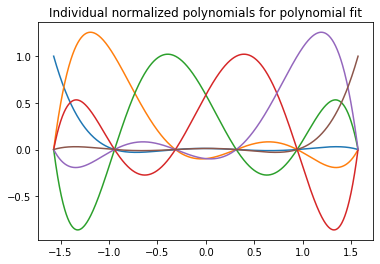

root mean squared error for polynomial fit on cos:  0.0005489936164600035


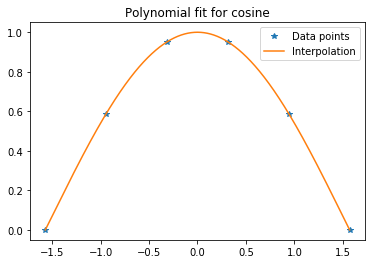

root mean squared error for cublic spline on cos:  0.0012417728867589132


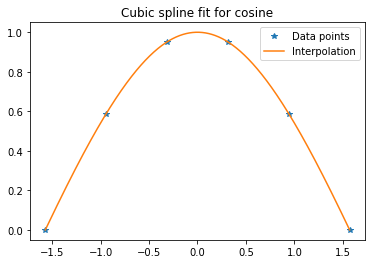

root mean squared error for rat fit on cos:  0.0008555136038120501


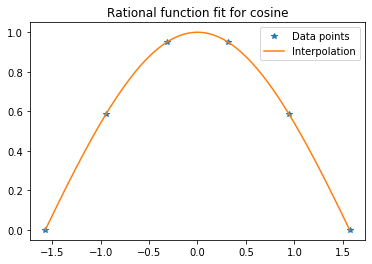

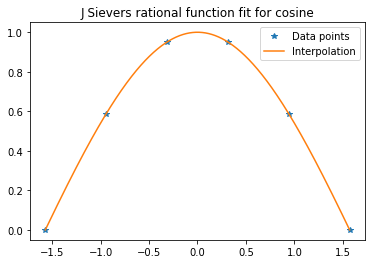

In [6]:
#create the data to interpolate
n = 3
m = 4
num_points = n + m - 1 #make sure the number of points works for the thing
num_test_points = 1042
xi = np.linspace(-np.pi/2, np.pi/2, num_points) #x data for cos function
yi = np.cos(xi) # y data for cos function
x_test = np.linspace(xi[0], xi[-1], num_test_points)
y_true = np.cos(x_test)


#polynomial interpolation
y_poly = fit_poly(xi, yi, x_test)
rmse_poly_cos = np.std(y_poly - y_true) #root mean squared error
print('root mean squared error for polynomial fit on cos: ', rmse_poly_cos)

mpl.figure()
mpl.plot(xi, yi, '*')
mpl.plot(x_test, y_poly)
mpl.title('Polynomial fit for cosine')
mpl.legend(['Data points', 'Interpolation'])
mpl.show()


#cubic spline
cs = sp_int.CubicSpline(xi, yi)
rmse_cs_cos = np.std(cs(x_test) - y_true)
print('root mean squared error for cublic spline on cos: ', rmse_cs_cos)

mpl.figure()
mpl.plot(xi, yi, '*')
mpl.plot(x_test, cs(x_test))
mpl.title('Cubic spline fit for cosine')
mpl.legend(['Data points', 'Interpolation'])
mpl.show()


#rational function interpolation
y_rf = rat_fit_full(xi, yi, n, m, x_test, SING_MAT=False)
rmse_rf_cos = np.std(y_rf - y_true)
# rmse_rf_cos_nonan = np.nanstd(y_rf - y_true)
print('root mean squared error for rat fit on cos: ', rmse_rf_cos)
# print('root mean squared error for rat fit on cos no nans: ', rmse_rf_cos_nonan)

mpl.figure()
mpl.plot(xi, yi, '*')
mpl.plot(x_test, y_rf)
mpl.title('Rational function fit for cosine')
mpl.legend(['Data points', 'Interpolation'])
mpl.show()


if DEBUG:
    # SANITY CHECK : Does my modified ratfit function get the same as JSievers
    p, q = rat_fit_JS(xi,yi,n,m)
    y_rf_js = rat_eval(p,q,x_test)

    mpl.figure()
    mpl.plot(xi, yi, '*')
    mpl.plot(x_test, y_rf_js)
    mpl.title('J Sievers rational function fit for cosine')
    mpl.legend(['Data points', 'Interpolation'])
    mpl.show()